In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = uproot.open("/lstr/sahara/act/data/DAOD_PHYSLITE.37621365._000015.pool.root.1")

In [3]:
# Access ttree
tree = file["CollectionTree"]

In [4]:
Electrons = tree.arrays(["AnalysisElectronsAuxDyn.charge", "AnalysisElectronsAuxDyn.pt","AnalysisElectronsAuxDyn.eta", "AnalysisElectronsAuxDyn.phi","AnalysisElectronsAuxDyn.m"])
Muons = tree.arrays(["AnalysisMuonsAuxDyn.charge", "AnalysisMuonsAuxDyn.pt","AnalysisMuonsAuxDyn.eta", "AnalysisMuonsAuxDyn.phi"]) # fixed me

In [5]:
e = ak.zip({
    "pt" : Electrons["AnalysisElectronsAuxDyn.pt"],
    "eta" : Electrons["AnalysisElectronsAuxDyn.eta"],
    "phi" : Electrons["AnalysisElectronsAuxDyn.phi"],
    "mass" : Electrons["AnalysisElectronsAuxDyn.m"],
    "charge" : Electrons["AnalysisElectronsAuxDyn.charge"]
})
mu = ak.zip({
    "pt" : Muons["AnalysisMuonsAuxDyn.pt"],
    "eta" : Muons["AnalysisMuonsAuxDyn.eta"],
    "phi" : Muons["AnalysisMuonsAuxDyn.phi"],
    "charge" : Muons["AnalysisMuonsAuxDyn.charge"]
})

In [6]:
#  Momentum components
def Px(pt, phi):
    return pt*np.cos(phi)

def Py(pt,phi):
    return pt*np.sin(phi)

def Pz(pt,eta):
    return pt*np.sinh(eta)

def E(pt, eta, m):
    return np.sqrt(pt**2 * np.cosh(eta)**2 + m**2)

e_px = Px(e.pt,e.phi)
e_py = Py(e.pt,e.phi)
e_pz = Pz(e.pt,e.eta)
e_E = E(e.pt,e.eta,e.mass)

In [7]:
def calc_invm(p1, p2):
    sumpx = Px(p1.pt, p1.phi) + Px(p2.pt, p2.phi)
    sumpy = Py(p1.pt, p1.phi) + Py(p2.pt, p2.phi)
    sumpz = Pz(p1.pt, p1.eta) + Pz(p2.pt, p2.eta)
    if not hasattr(p1, 'mass'):
        sumE = E(p1.pt, p1.eta, 0) + E(p2.pt, p2.eta, 0)
    else:
        sumE = E(p1.pt, p1.eta, p1.mass) + E(p2.pt, p2.eta, p2.mass)
    
    invm = np.sqrt(sumE**2 - sumpx**2 - sumpy**2 - sumpz**2)
    return invm/1000.0 # in GeV

In [55]:
def selection_calc(lepton):
    #Apply cut for 25 GeV and 2 leptons
    lepton_cut = (ak.num(lepton.charge) == 2) & (lepton.pt>25000)
    cleaned_lepton = lepton[lepton_cut]
    #Apply cut for opposite charges
    charge_cut = (np.abs(ak.sum(cleaned_lepton.charge,axis=1)) < ak.num(cleaned_lepton.charge,axis=1))
    cleaned_charge = cleaned_lepton[charge_cut]
    #Invariant Mass Calculations
    result = [float(calc_invm(p1,p2)) for p1,p2 in cleaned_charge]
    return result

In [57]:
electrons = selection_calc(e)
muons = selection_calc(mu)

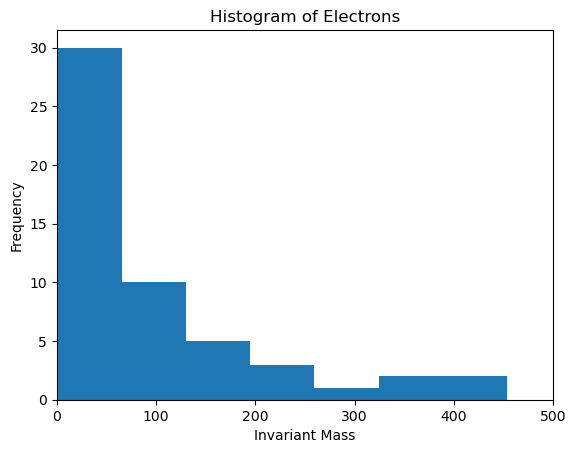

Z mass is: 0.24261859759963705 GeV


In [58]:
e_counts, e_bins = np.histogram(electrons, bins='auto')
plt.hist(e_bins[:-1], e_bins, weights=e_counts)
plt.xlim(0, 500)
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Electrons')
plt.show()
print("Z mass is:", e_bins[np.argmax(e_counts)], "GeV")

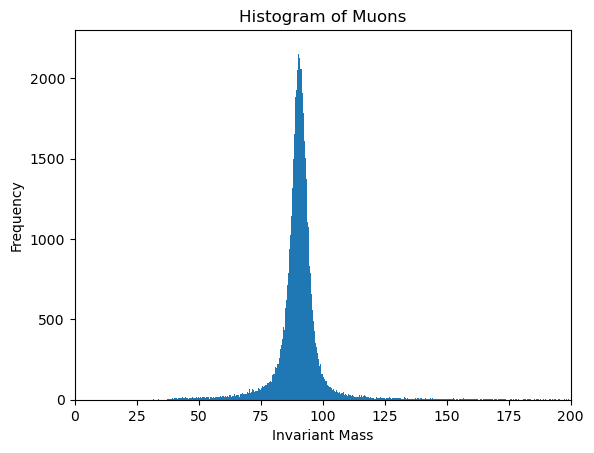

Z mass is: 90.66940866328432 GeV


In [59]:
mu_counts, mu_bins = np.histogram(muons, bins='auto')
plt.hist(mu_bins[:-1], mu_bins, weights=mu_counts)
plt.xlim(0, 200)
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Muons')
plt.show()
print("Z mass is:", mu_bins[np.argmax(mu_counts)], "GeV")

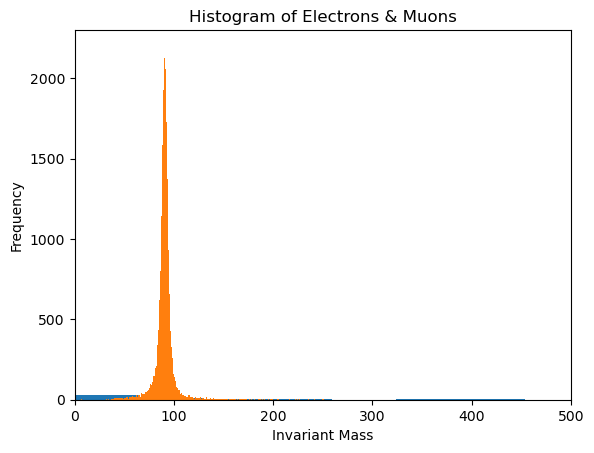

Z mass for Electrons is: 0.24261859759963705 GeV
Z mass for Muons is: 90.66940866328432 GeV


In [61]:
e_counts, e_bins = np.histogram(electrons, bins='auto')
mu_counts, mu_bins = np.histogram(muons, bins='auto')
plt.hist(e_bins[:-1], e_bins, weights=e_counts, label="Electrons")
plt.hist(mu_bins[:-1], mu_bins, weights=mu_counts, label="Muons")
plt.xlim(0, 500)
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Electrons & Muons')
plt.show()
print("Z mass for Electrons is:", e_bins[np.argmax(e_counts)], "GeV")
print("Z mass for Muons is:", mu_bins[np.argmax(mu_counts)], "GeV")